# Drifter Chain RBR Solo Processing

In [16]:
from pathlib import Path
import numpy as np
import rbrmoored
import xarray as xr
import gvpy as gv

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The time offset for the RBR Solo has been recorded with a computer set to local time, need to adjust the time drift parameter by 7 hours.

In [31]:
rbr_data_dir = Path("/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/")
data_raw_dir = rbr_data_dir.joinpath("raw")
files = sorted(data_raw_dir.glob("*.rsk"))

In [32]:
data_proc_dir = rbr_data_dir.joinpath("proc")
fig_dir = rbr_data_dir.joinpath("fig")

In [33]:
tmpf = files[0]

reading raw rsk file
reading SN 230748
applying time offset of -2052.0ms
Saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/proc/230748_20240522_2121.nc


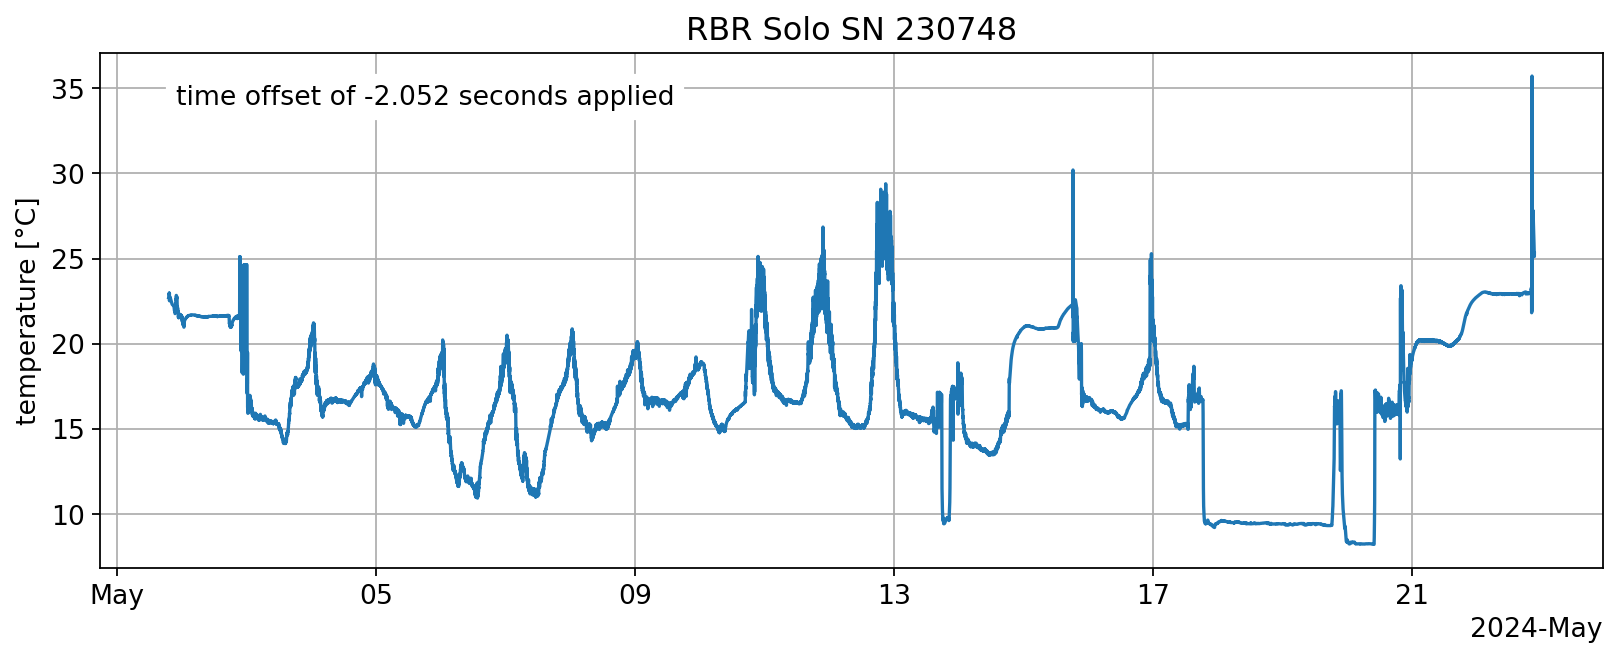

In [45]:
t = rbrmoored.solo.proc(tmpf, data_out=data_proc_dir, figure_out=fig_dir, show_plot=True, offset_time_drift=7)

Process all files

In [62]:
if False:
    for file in files:
        t = rbrmoored.solo.proc(
            file, data_out=data_proc_dir, figure_out=fig_dir, show_plot=True, offset_time_drift=7
        )

Read all files.

In [63]:
files_nc = sorted(data_proc_dir.glob("*.nc"))

In [65]:
allt = [xr.open_dataarray(file) for file in files_nc]

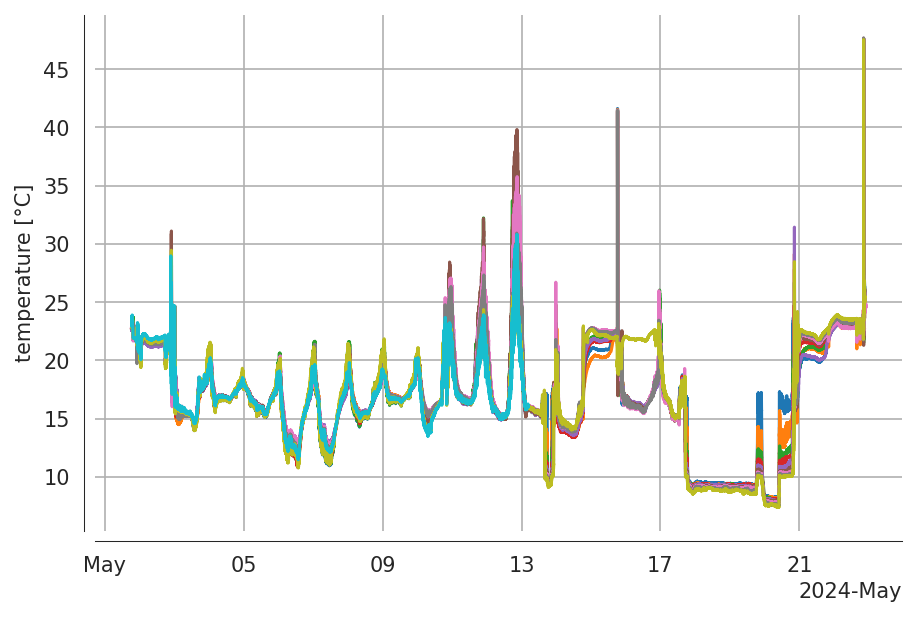

In [82]:
fig, ax = gv.plot.quickfig()
for ti in allt:
    ti.gv.plot(ax=ax)
ax.grid()

In [68]:
ts = slice("2024-05-17", "2024-05-22")
tt = [ti.sel(time=ts) for ti in allt]

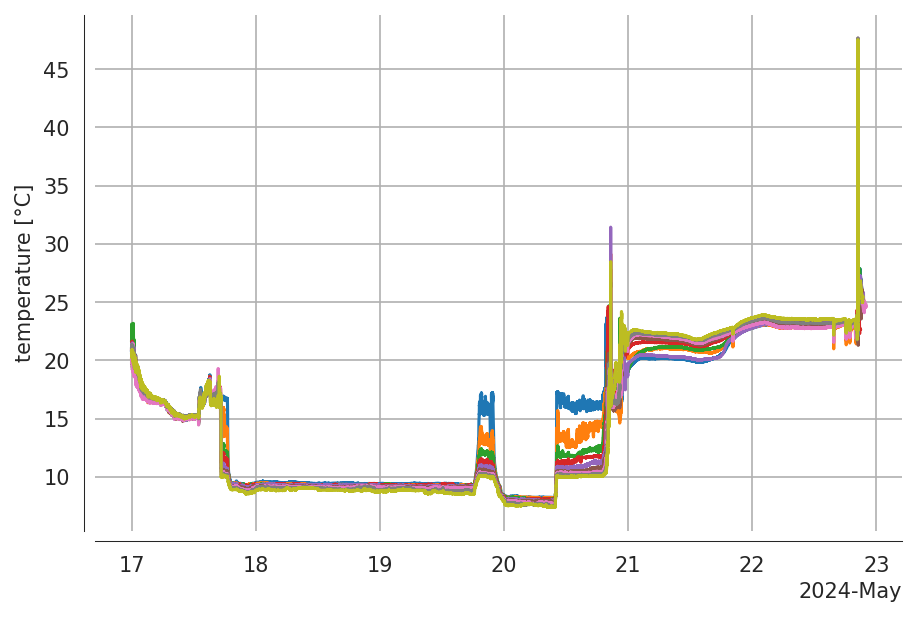

In [78]:
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.gv.plot(ax=ax)
ax.grid()

Plot clock calibration - everything within 1s. The one outlier may be the one that displayed a funky time offset.

saving to /Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/fig/


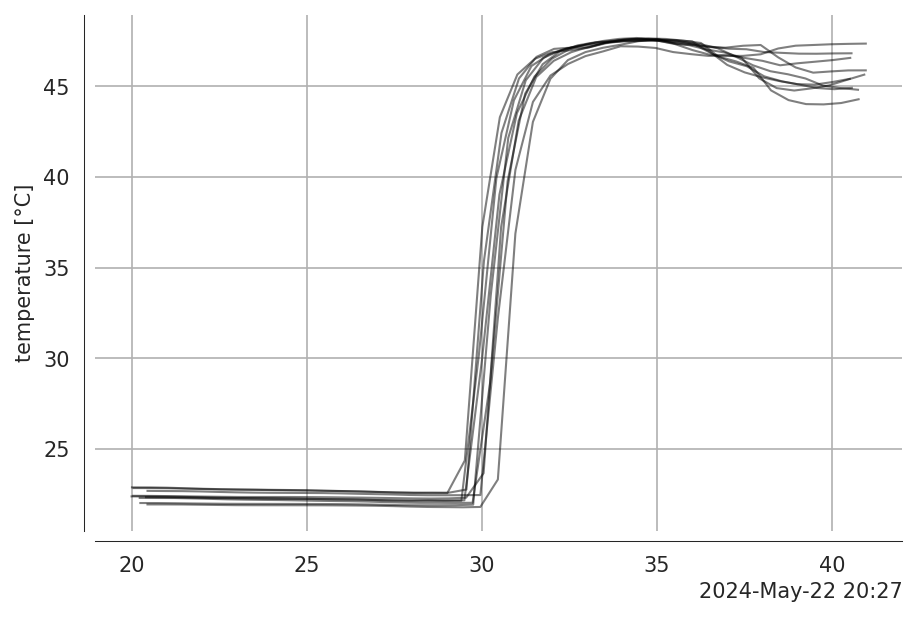

In [86]:
ts_dip = slice("2024-05-22 20:27:20", "2024-05-22 20:27:40")
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.sel(time=ts_dip).gv.plot(ax=ax, color="k", alpha=0.5, linewidth=1)
ax.grid()
gv.plot.png(
    "/Users/gunnar/Projects/nesma/drifter/data/drifter_chain_2024_05/rbrsolo/fig/clock_verification"
)

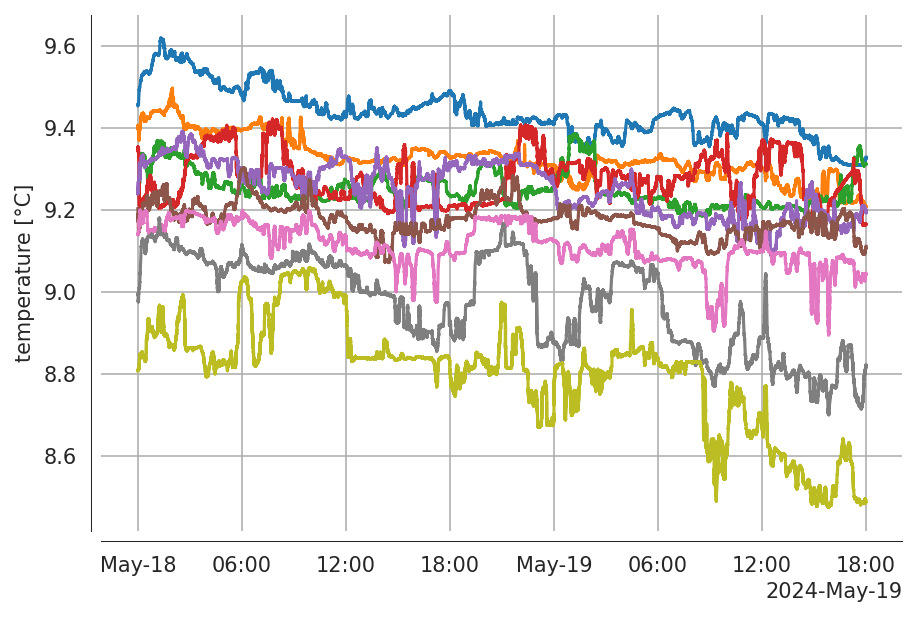

In [81]:
ts_dip = slice("2024-05-18", "2024-05-19 18:00")
fig, ax = gv.plot.quickfig()
for ti in tt:
    ti.sel(time=ts_dip).gv.plot(ax=ax)
ax.grid()